In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from utility import load_data

%matplotlib inline

In [2]:
df = load_data(1)

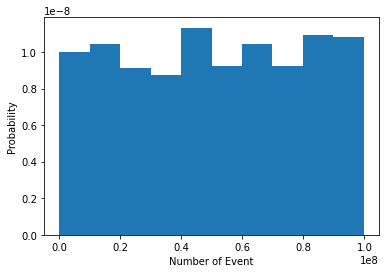

In [3]:
plt.hist(df['event_number'], density=True, bins=10)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Number of Event');

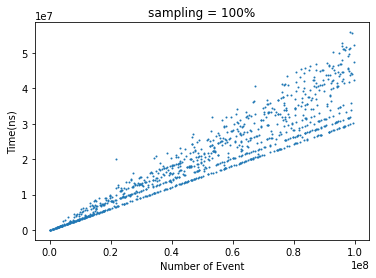

In [4]:
sample_ratio = 1
df_sample = df.sample(frac=sample_ratio)
plt.scatter(df_sample['event_number'], df_sample['time'], s=1)
plt.title('sampling = {}%'.format(sample_ratio*100))
plt.ylabel('Time(ns)')
plt.xlabel('Number of Event');
plt.show()

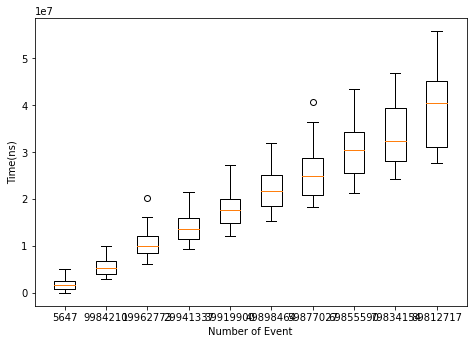

In [5]:
maximum, minimum = df['event_number'].max(), df['event_number'].min()
number_bin = 10
    
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(
    [df[(df['event_number'] > minimum + i * (maximum-minimum)/10) 
       & (df['event_number'] < minimum + (i + 1) * (maximum-minimum)/10)]['time'] for i in range(number_bin)],
    positions=[ int(minimum + i * (maximum-minimum)/10) for i in range(number_bin)], 
    widths = [ (maximum-minimum)/10/2 for i in range(number_bin)], 
    showfliers=True)

plt.ylabel('Time(ns)')
plt.xlabel('Number of Event');

# ax.legend([ '{}: dataset{}'.format(i, i) for i in range(1,6)] + ['6: Full Set'], bbox_to_anchor=(1.1, 1))
plt.show()

In [6]:
df_shuffle = df.sample(frac=1)
X, Y = np.array([ [item] for item in df_shuffle['event_number'] ]), df_shuffle['time']
split = int(0.95 * len(X))
train_x = X[:split]
test_x =X[split:]

train_y = Y[:split]
test_y =Y[split:]

In [7]:
def mean_absolute_percentage_error(pred_y, test_y):
    return np.mean(np.abs((test_y - pred_y) / test_y))

In [8]:
reg = LinearRegression().fit(train_x, train_y)
# reg.coef_
# reg.intercept_
# reg.predict(np.array([[3, 5]]))
# reg.coef_, reg.intercept_
# reg.score(test_x, test_y)
prediction = reg.predict(test_x)
MAE = mean_absolute_error(prediction, test_y)
MAPE = mean_absolute_percentage_error(prediction, test_y)
print('MAE = {:.2f}(ns)\nMAPE = {:.2f}%'.format(MAE, MAPE*100))

MAE = 4206276.03(ns)
MAPE = 18.44%


In [9]:
def abline(slope, intercept, color='r'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color=color)

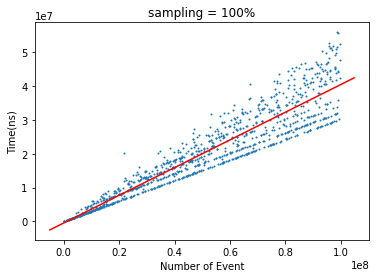

In [10]:
sample_ratio = 1
df_sample = df.sample(frac=sample_ratio)
plt.scatter(df_sample['event_number'], df_sample['time'], s=1)
plt.title('sampling = {}%'.format(sample_ratio*100))
plt.ylabel('Time(ns)')
plt.xlabel('Number of Event');
abline(reg.coef_, reg.intercept_)
plt.show()